In [2]:
import re
import numpy as np
import pandas as pd
import jieba
import openpyxl
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
jieba.dt.cache_file = 'jieba.cache.lmspeech'

# Anti-imports legislators in Tsai era

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.004 seconds.
Prefix dict has been built successfully.


進口 889
美國 717
臺灣 621
豬肉 565
萊克多巴胺 559
萊豬 513
開放 496
美豬 481
瘦肉精 468
標示 394


   Terms  Freq.
0     進口    889
1     美國    717
2     臺灣    621
3     豬肉    565
4  萊克多巴胺    559
5     萊豬    513
6     開放    496
7     美豬    481
8    瘦肉精    468
9     標示    394


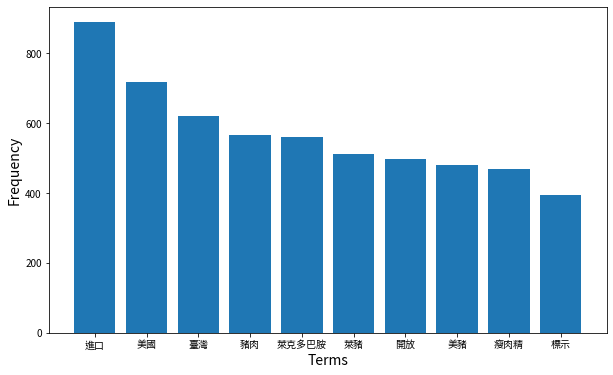

In [3]:
data = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/antiimportsspeech_tsai.xlsx")
data.fillna("",inplace=True)
lmspeech = list(data['text'])
data.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech]
for idx, speech in enumerate(lmspeech):
    lmspeech[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo = pd.DataFrame(columns=['發言內容'], data = lmspeech)
swo.to_excel("test_bnfma.xlsx", encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech)
    bag_of_words = vec.transform(lmspeech)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(lmspeech, 10)
for word, freq in common_words:
    print(word, freq)

import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

tsai_plotly = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
tsai_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of anti-imports legislators in Tsai era')

common_words
cwdf = pd.DataFrame(common_words, columns=['Terms', 'Freq.'])  
print(cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,6))
plt.bar(cwdf['Terms'],
       cwdf['Freq.'])

plt.xlabel('Terms', fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
#plt.title("The 10 most frequent terms of anti-imports legislators in Tsai era", fontsize = 18)

plt.show()